#GRIPMAR21 The Sparks Foundation

#Author: PRADEEP K

###Supervised Machine Learning


Supervised learning is the machine learning concept.It is learning with a labeled training set. It is two types regression(For continuous values) and classification(For discrete values ( classes)).

##Problem Statement: Predict the percentage of an student based on the no. of study hours. 

###This is a simple linear regression task(If you know something about X, this knowledge helps you predict something about Y).
 

<p> The linear formula is <b> Y = mX + C</b> which is linearly fit with the data. Here, m (slope) is coefficient value which is multiplied by X variable , C is the Y intercept value</p>

Variables:
• X = Independent Variable (we provide this)
• Y = Dependent Variable (we observe this)
• m = Coeffiecient


Importing Libraries

In [24]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error



###Data load

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head() # showing first five rows 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##Exploratory Data Analysis and Data Preparation

In [26]:
data.columns ## showing column names

Index(['Hours', 'Scores'], dtype='object')

In [27]:
data.shape ## shape of Dataset

(25, 2)

In [28]:
data.size ## Dataset size 

50

In [29]:
data.info() # Brief information about Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [30]:
data.isnull().sum() # Check missing values is available or not

Hours     0
Scores    0
dtype: int64

In [31]:
data.describe() ## Describe statistics  analysis (Data)

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
data.mean() # Find each columns mean(average) value

Hours      5.012
Scores    51.480
dtype: float64

In [33]:
data.std()#standard deviation

Hours      2.525094
Scores    25.286887
dtype: float64

In [34]:
data.var()#variance

Hours       6.376100
Scores    639.426667
dtype: float64

####Data Visualization

Let's plot our data points on 2-D graph and to check any relationship between the data(manually).Scores vs Hours

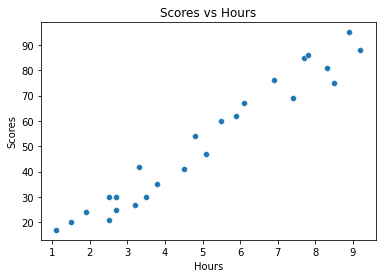

In [35]:
sns.scatterplot(data.Hours, data.Scores)
plt.title('Scores vs Hours')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

###Separated by feature columns(inputs) and target column (Output)

In [36]:
X = data.drop('Scores', axis=1)
y = data.Scores

###Sample Splitting to train data and test data(70:30)

By using Scikit-Learn's built-in train_test_split() method:

In [37]:

X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.70, test_size = 0.30, random_state = 12)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)


X_train:  (17, 1)
X_test:  (8, 1)
y_train:  (17,)
y_test:  (8,)


##Model Building

In [38]:

lr = LinearRegression()
lr.fit(X_train , y_train)#Model creation by the help of Train data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_predict = lr.predict(X_test)#predit Y data using value of X and model
print(y_predict)

[74.97365707 56.40147769 62.26637644 52.49154519 89.63590396 83.7710052
 36.85181518 13.39222016]


In [40]:
print(y_test)

19    69
7     60
18    67
1     47
15    95
8     81
4     30
14    17
Name: Scores, dtype: int64


In [41]:
print("Coefficient Value: ", lr.coef_)
print("Ïntercept Value: ", lr.intercept_)

Coefficient Value:  [9.77483126]
Ïntercept Value:  2.639905784194248


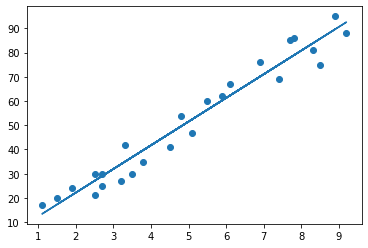

In [42]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [43]:
data_1 = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_predict,'Difference': (y_predict - y_test)})
data_1

,Actual Value,Predicted Value,Difference
19,69,74.973657,5.973657
7,60,56.401478,-3.598522
18,67,62.266376,-4.733624
1,47,52.491545,5.491545
15,95,89.635904,-5.364096
8,81,83.771005,2.771005
4,30,36.851815,6.851815
14,17,13.392220,-3.607780


###What will be predicted score if a student studies for 9.25 hrs/ day?

In [44]:
predict = lr.predict([[9.25]])
print(predict)

[93.0570949]


##Evaluate The Model 

<p><img style="width:300px;height:400px;" src = "https://imgur.com/Z85Iylh.png" alt = ""></p>

In [45]:


print("Mean Absolute Error: ", mean_absolute_error(y_predict, y_test))
print("Mean Squared Error: ", mean_squared_error(y_predict, y_test))
print("Root Mean Squared Error(RMSE): ", np.sqrt(mean_squared_error(y_predict, y_test)))

Mean Absolute Error:  4.7990055486547325
Mean Squared Error:  24.701705618997128
Root Mean Squared Error(RMSE):  4.97008104752801


### Inference: For 9.25 hours of study percentage expected is 93% .

#Thank You for watching